<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">



<h1 align=center><font size = 5>Linear Regression 1-D: Training Two Parameter Mini-Batch Gradient Decent (SGD)</font></h1> 

# Table of Contents
In this Lab, you will practice training a model by using Mini-Batch Gradient descent.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data </a></li>
<li><a href="#ref1">Create the Model and Cost Function (total loss) </a></li>
<li><a href="#ref2">Train the Model:Batch Gradient Descent</a></li>
<li><a href="#ref3">Train the Model:Stochastic gradient descent</a></li>
<li><a href="#ref4">Train the Model:Stochastic gradient descent with Data Loader </a></li>

<li><a href="#ref5">Practice Questions  </a></li>
<br>
<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>

<hr>

You'll need the following libraries:  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with Pytorch. 

In [2]:
class plot_error_surfaces(object):
    def __init__(self,w_range, b_range,X,Y,n_samples=30,go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z=np.zeros((30,30))
        count1=0
        self.y=Y.numpy()
        self.x=X.numpy()
        for w1,b1 in zip(w,b):
            count2=0
            for w2,b2 in zip(w1,b1):
                Z[count1,count2]=np.mean((self.y-w2*self.x+b2)**2)
                count2 +=1
    
            count1 +=1
        self.Z=Z
        self.w=w
        self.b=b
        self.W=[]
        self.B=[]
        self.LOSS=[]
        self.n=0
        if go==True:
            plt.figure()
            plt.figure(figsize=(7.5,5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    def get_stuff(self,W,B,loss):
        self.n=self.n+1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
        
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c='r', marker='x',s=200,alpha=1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x,self.y,'ro',label="training points")
        plt.plot(self.x,self.W[-1]*self.x+self.B[-1],label="estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data Space Iteration: '+str(self.n))
        plt.legend()
        plt.show()
        plt.subplot(122)
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.title('Loss Surface Contour ')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.legend()

<a id="ref0"></a>
<h2 align=center>Make Some Data </h2>

Import Pytorch: 

In [3]:
import torch

Set random seed: 

In [4]:
torch.manual_seed(1)

Generate values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate. Add some noise to the data:

In [5]:
X=torch.arange(-3,3,0.1).view(-1, 1)
w=torch.tensor(-10.0,requires_grad=True)
f=1*X-1
Y=f+0.1*torch.randn(X.size())

Plot the results:

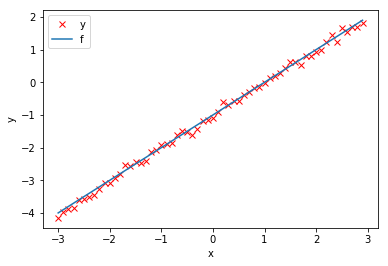

In [6]:
plt.plot(X.numpy(),Y.numpy(),'rx',label='y')
plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<a id="ref1"></a>
<h2 align=center>Create the Model and Cost Function (total loss) </h2>

Define the forward function: 

In [7]:
def forward(x):
    return w*x+b

Define the cost or criterion function: 

In [8]:
def criterion(yhat,y):
    
    return torch.mean((yhat-y)**2)

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

<Figure size 432x288 with 0 Axes>

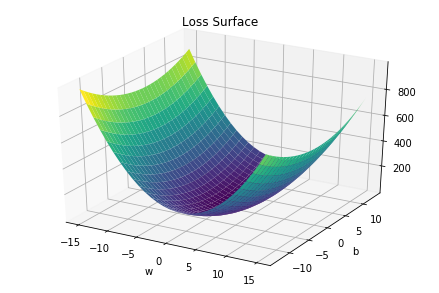

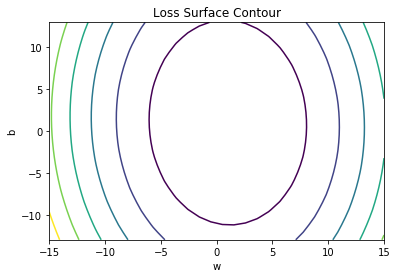

In [9]:
get_surface=plot_error_surfaces(15,13,X,Y,30)

<a id="ref2"></a>
<h2> Train the Model: Batch Gradient Descent</h2>
Create a model parameter by setting the argument <code>requires_grad<code> to True because the system must  learn it.

Set the epochs and learning rate: 

In [10]:
epochs=10
lr=0.1

Run 10 epochs of batch gradient descent: **bug** data space is 1 iteration ahead of parameter space. 

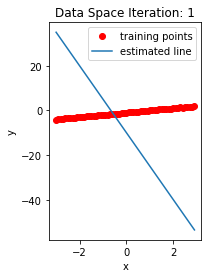

No handles with labels found to put in legend.


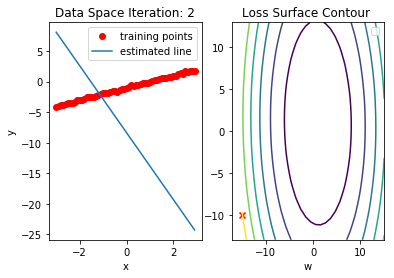

No handles with labels found to put in legend.


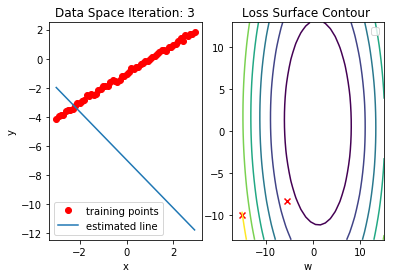

No handles with labels found to put in legend.


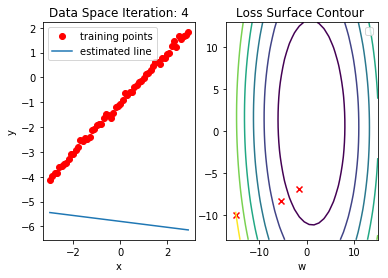

No handles with labels found to put in legend.


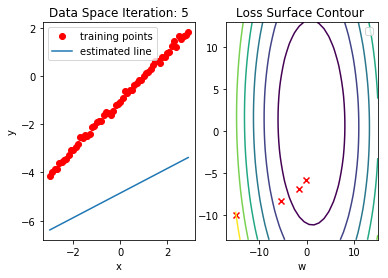

No handles with labels found to put in legend.


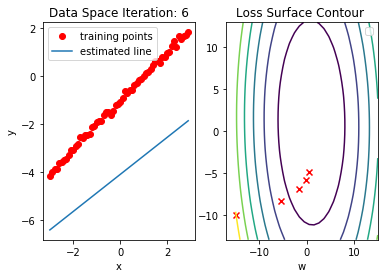

No handles with labels found to put in legend.


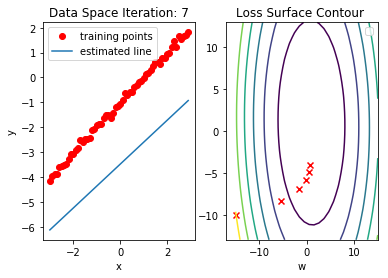

No handles with labels found to put in legend.


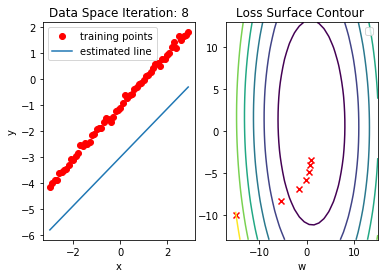

No handles with labels found to put in legend.


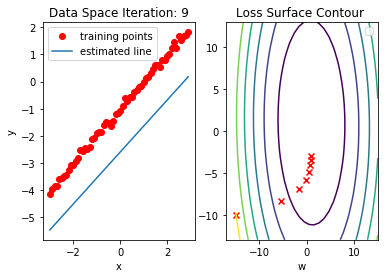

No handles with labels found to put in legend.


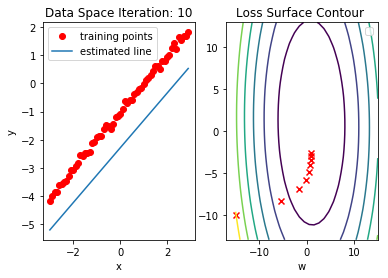

No handles with labels found to put in legend.


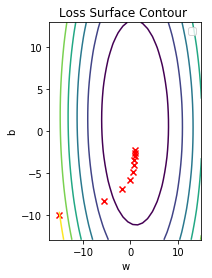

In [11]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)
def forward(x):
    return w*x+b
LOSS=[]
for epoch in range(epochs):

    Yhat=forward(X)
    loss=criterion(Yhat,Y)
    LOSS.append(loss)
    get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
    get_surface.plot_ps()
    loss.backward()
    w.data=w.data-lr*w.grad.data
    b.data=b.data-lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

<a id="ref3"></a>

<h2> SGD with Dataset DataLoader</h2> </h2>

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

In [12]:
get_surface=plot_error_surfaces(15,13,X,Y,30,go=False)

Create a <code>Dataset</code> class:

In [13]:
from torch.utils.data import Dataset, DataLoader

In [14]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.arange(-3,3,0.1).view(-1, 1)
        self.y=1*X-1
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

Create a dataset object: 

In [15]:
dataset=Data()

Create a dataloader object: 

In [16]:
trainloader=DataLoader(dataset=dataset,batch_size=1)

Run 10 epochs of stochastic gradient descent: **bug** data space is 1 iteration ahead of parameter space. 

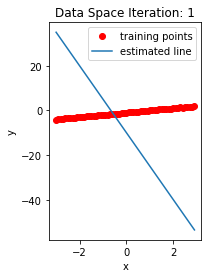

No handles with labels found to put in legend.


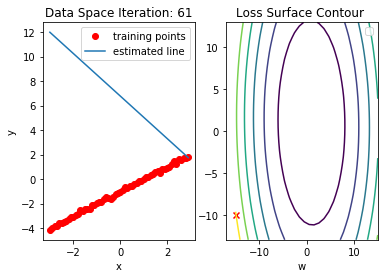

No handles with labels found to put in legend.


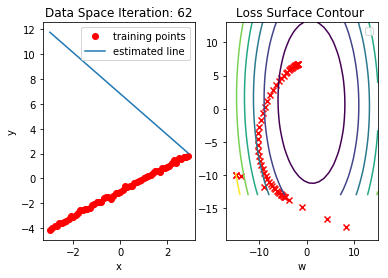

No handles with labels found to put in legend.


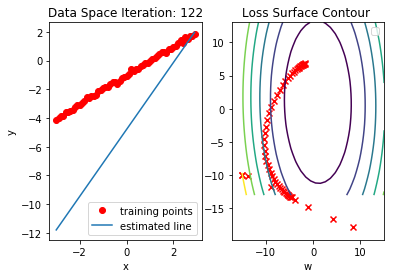

No handles with labels found to put in legend.


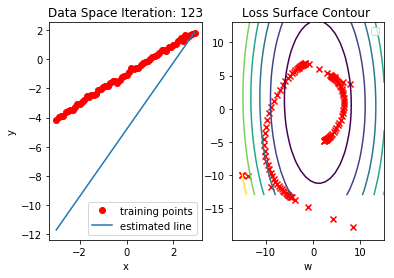

No handles with labels found to put in legend.


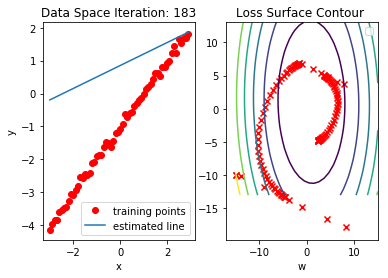

No handles with labels found to put in legend.


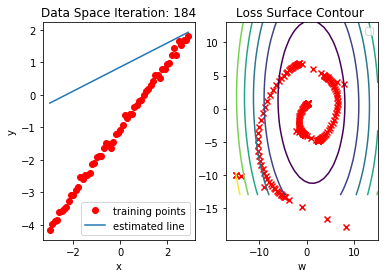

No handles with labels found to put in legend.


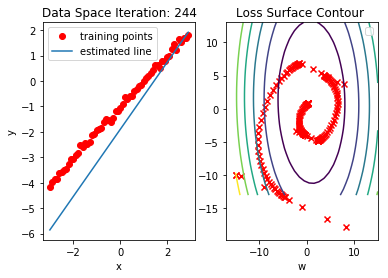

No handles with labels found to put in legend.


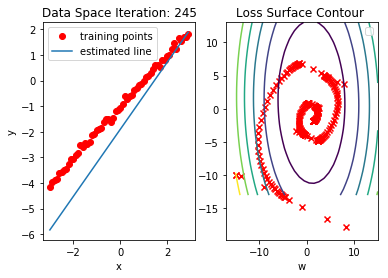

No handles with labels found to put in legend.


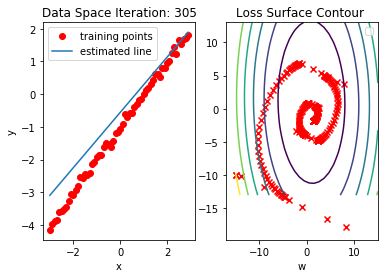

No handles with labels found to put in legend.


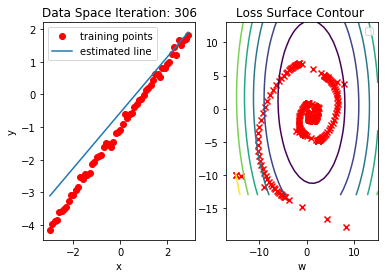

No handles with labels found to put in legend.


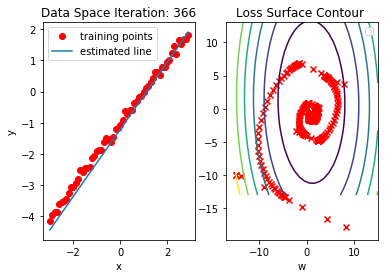

No handles with labels found to put in legend.


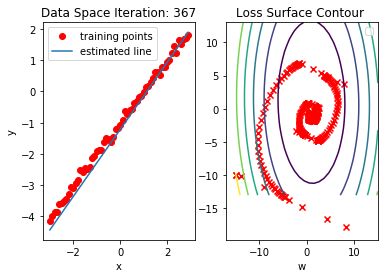

No handles with labels found to put in legend.


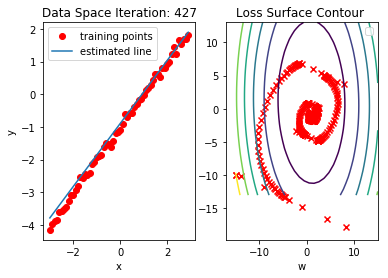

No handles with labels found to put in legend.


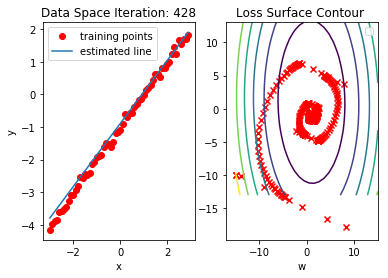

No handles with labels found to put in legend.


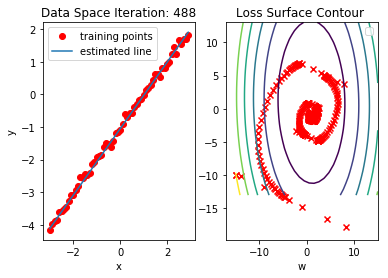

No handles with labels found to put in legend.


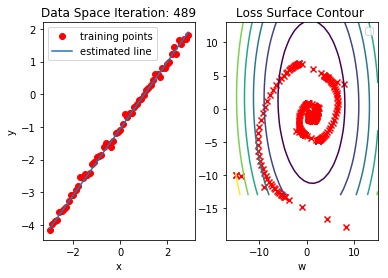

No handles with labels found to put in legend.


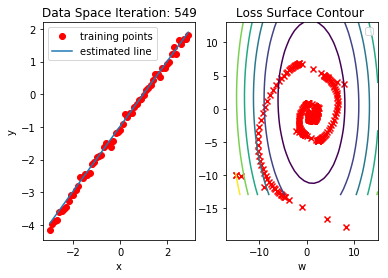

No handles with labels found to put in legend.


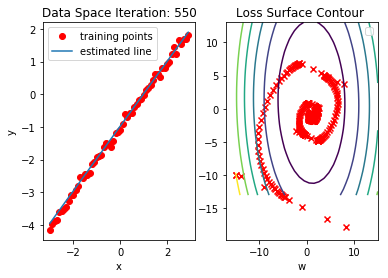

No handles with labels found to put in legend.


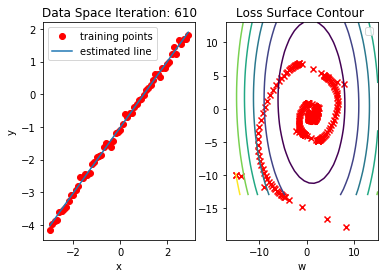

No handles with labels found to put in legend.


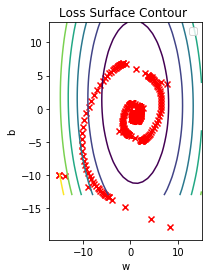

In [17]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)
LOSS1=[]

for epoch in range(epochs):
    get_surface.get_stuff(w.data.tolist(),b.data.tolist(),criterion(Yhat,Y).tolist())
    get_surface.plot_ps()
    LOSS1.append(criterion(forward(X),Y).tolist())
    for x,y in trainloader:
        yhat=forward(x)
        loss=criterion(yhat,y)
        get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    get_surface.plot_ps() 

<a id="ref4"></a>

<h2>Mini Batch Gradient Decent: Batch Size Equals 5 </h2> 

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

In [18]:
get_surface=plot_error_surfaces(15,13,X,Y,30,go=False)

Create a dataloader object where the batch size equals 5:

In [19]:
trainloader=DataLoader(dataset=dataset,batch_size=5)

Run 10 epochs of mini-batch gradient descent: **bug** data space is 1 iteration ahead of parameter space. 

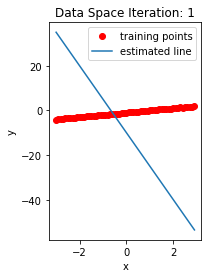

No handles with labels found to put in legend.


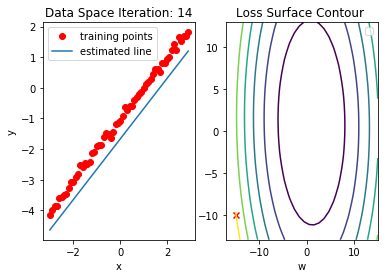

No handles with labels found to put in legend.


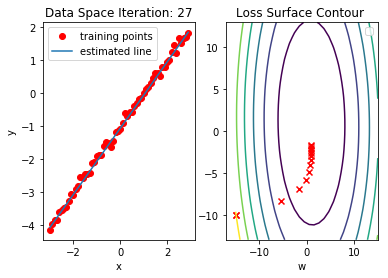

No handles with labels found to put in legend.


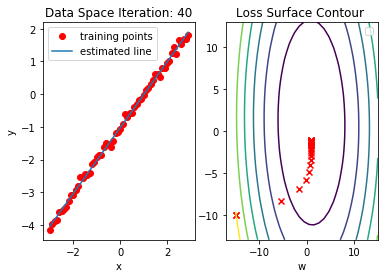

No handles with labels found to put in legend.


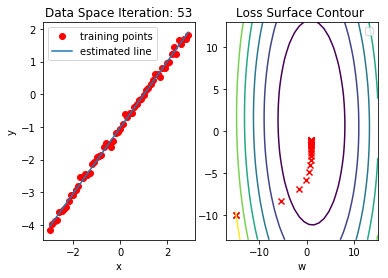

No handles with labels found to put in legend.


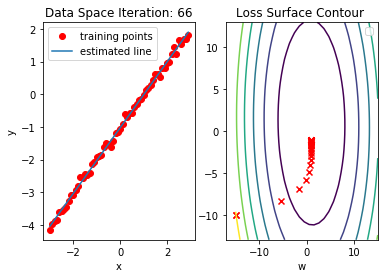

No handles with labels found to put in legend.


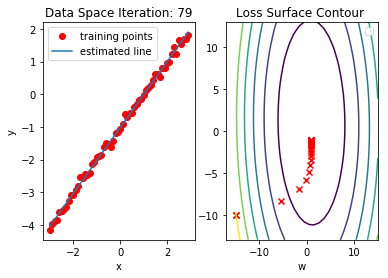

No handles with labels found to put in legend.


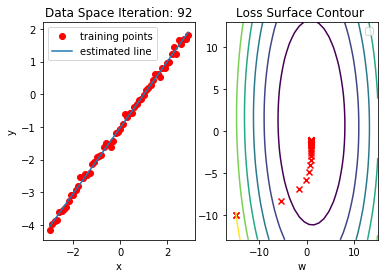

No handles with labels found to put in legend.


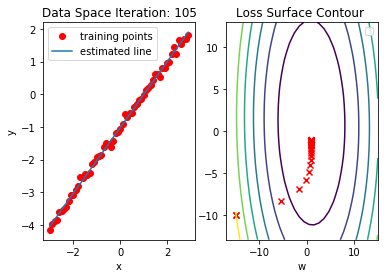

No handles with labels found to put in legend.


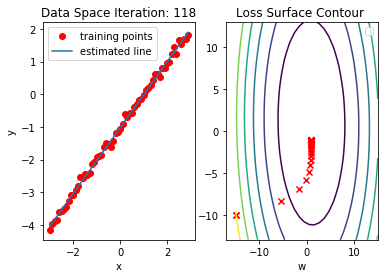

No handles with labels found to put in legend.


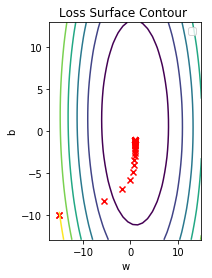

In [20]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

LOSS5=[]
for epoch in range(epochs):
    get_surface.get_stuff(w.data.tolist(),b.data.tolist(),criterion(Yhat,Y).tolist())
    get_surface.plot_ps()
    LOSS5.append(criterion(forward(X),Y).tolist())
    for x,y in enumerate(trainloader):
        Yhat=forward(X)
        loss=criterion(Yhat,Y)
        get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

<a id="ref5"></a>

<h2>Mini Batch Gradient Decent: Batch Size Equals 10</h2> 

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

In [21]:
get_surface=plot_error_surfaces(15,13,X,Y,30,go=False)

create a dataloader object batch size equals 10

In [22]:
trainloader=DataLoader(dataset=dataset,batch_size=10)

Run 10 epochs of mini-batch gradient descent: **bug** data space is 1 iteration ahead of parameter space. 

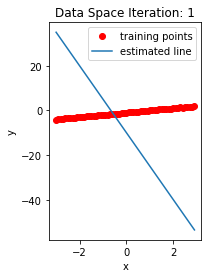

No handles with labels found to put in legend.


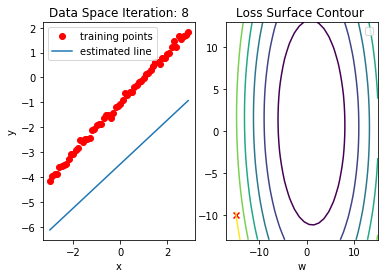

No handles with labels found to put in legend.


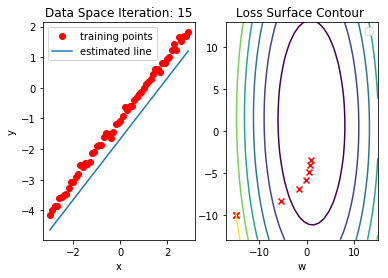

No handles with labels found to put in legend.


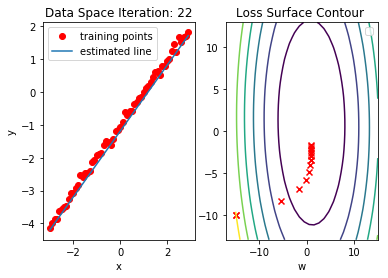

No handles with labels found to put in legend.


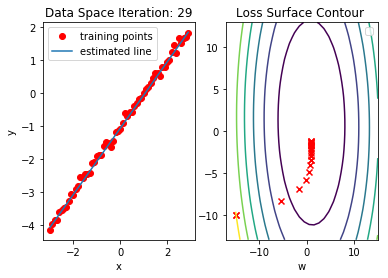

No handles with labels found to put in legend.


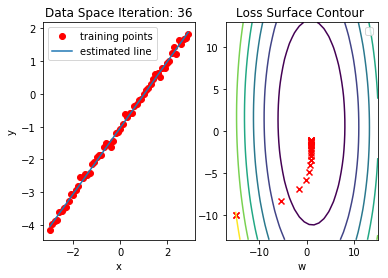

No handles with labels found to put in legend.


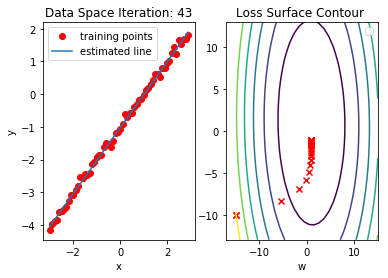

No handles with labels found to put in legend.


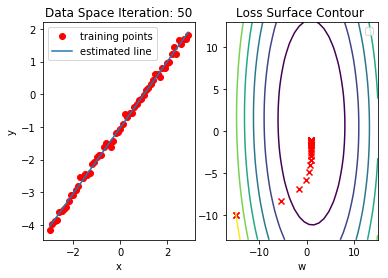

No handles with labels found to put in legend.


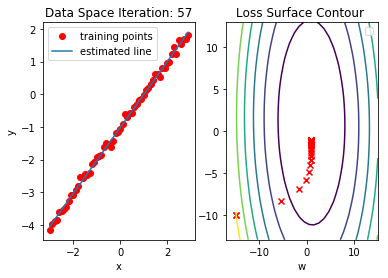

No handles with labels found to put in legend.


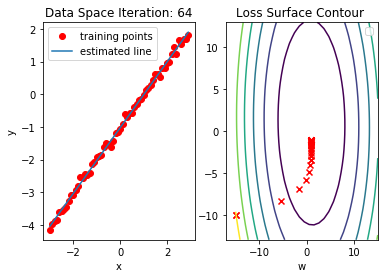

No handles with labels found to put in legend.


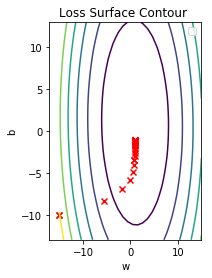

In [23]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

LOSS10=[]
for epoch in range(epochs):
    get_surface.get_stuff(w.data.tolist(),b.data.tolist(),criterion(Yhat,Y).tolist())
    get_surface.plot_ps()
    LOSS10.append(criterion(forward(X),Y).tolist())
    for x,y in enumerate(trainloader):
        Yhat=forward(X)
        loss=criterion(Yhat,Y)
        get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

Plot the loss for each epoch:  

In [ ]:
plt.plot(LOSS,label="Batch Gradient Descent")
plt.plot(LOSS1,label="Stochastic Gradient Descent")
plt.plot(LOSS5,label="Mini-Batch Gradient Descent,Batch size:5")
plt.plot(LOSS10,label="Mini-Batch Gradient Descent,Batch size:10")
plt.legend()

<a id="ref6"></a>
<h2 align=center>Practice Question </h2>

####  Perform mini batch gradient descent with a batch size of 20. Store the total loss for each epoch in the list LOSS20.  

Double-click __here__ for the solution.

<!-- 
trainloader=DataLoader(dataset=dataset,batch_size=20)
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

LOSS20=[]
for epoch in range(epochs):
    get_surface.get_stuff(w.data.tolist(),b.data.tolist(),criterion(Yhat,Y).tolist())
    get_surface.plot_ps()
    LOSS20.append(criterion(forward(X),Y).tolist())
    for x,y in enumerate(trainloader):
        Yhat=forward(X)
        loss=criterion(Yhat,Y)
        get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

-->


#### Plot a graph that overlays the loss for each of the different mini batch losses for each epoch.

Double-click __here__ for the solution.

<!-- 
plt.plot(LOSS,label="Batch Gradient Descent")
plt.plot(LOSS1,label="Stochastic Gradient Descent")
plt.plot(LOSS5,label="Mini-Batch Gradient Descent,Batch size:5")
plt.plot(LOSS10,label="Mini-Batch Gradient Descent,Batch size:10")
plt.plot(LOSS20,label="Mini-Batch Gradient Descent,Batch size:20")
plt.legend()


-->





### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/)  

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).